In [1]:
# information of example : https://buzzorange.com/techorange/2019/07/29/pytorch-perform-simple-linear-regression/
import torch
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt

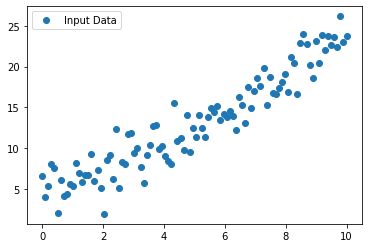

In [2]:
# Step 1. Build Dataset

## choose a seed of random , information : https://segmentfault.com/a/1190000016097466
## This make sure number will be the same with random every times
np.random.seed(0)
torch.manual_seed(0)

## use numpy to build Dataset , according to the seed of random
## Make sure you know the linear function : y = wx +b

w = 2 ; b = 3
x = np.linspace(0,10,100)
y = w * x + b + np.random.randn(100) * 2  # np.random.randn() information : https://www.itread01.com/content/1546341127.html


x = x.reshape(-1,1)
y = y.reshape(-1,1)  # np.reshape() information : https://www.zhihu.com/question/52684594

## view the dataset
plt.plot(x,y,"o",label="Input Data")
plt.legend()
plt.show()

In [3]:
# Step 2. Build Linear Regression Model

## example     : https://shenxiaohai.me/2018/10/18/pytorch_tutorial_basic_02/ , https://mc.ai/pytorch-%E7%AD%86%E8%A8%98-2-%E7%B7%9A%E6%80%A7%E8%BF%B4%E6%AD%B8/
## super()     : https://www.runoob.com/python/python-func-super.html
## torch.nn.Linear() : https://pytorch-cn.readthedocs.io/zh/latest/package_references/torch-nn/#linear-layers

class LinearRegressionModel(torch.nn.Module):
    def __init__( self, input_dimension , output_dimension):
        super(LinearRegressionModel,self).__init__()
        self.model = torch.nn.Linear(input_dimension,output_dimension)
        
    def forward(self,x):
        y_prediction = self.model(x)
        return y_prediction

model = LinearRegressionModel(input_dimension=1,output_dimension=1)

In [4]:
# Step3. setup loss function , optimizer , and parameter
## We use Mean-Square Error(MSE) Loss function , MSE information : https://buzzorange.com/techorange/2018/06/22/computer-learning-5-tips/
## And choose SGD optimizer : https://medium.com/uxai/%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92%E9%A6%AC%E6%8B%89%E6%9D%BE-076-%E5%84%AA%E5%8C%96%E5%99%A8-optimizers-19b8d40e24c5

loss_function = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.02)
inputs = Variable(torch.from_numpy(x.astype("float32")  )  )
outputs = Variable(torch.from_numpy(y.astype("float32")  )  )
number_epochs = 100

epoch : 10 , loss : 5.391202926635742


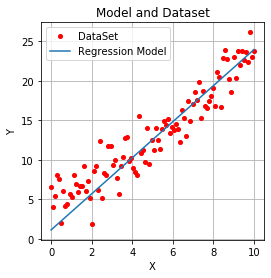

epoch : 20 , loss : 5.145542621612549


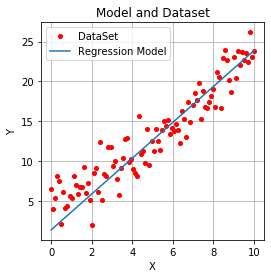

epoch : 30 , loss : 4.9443254470825195


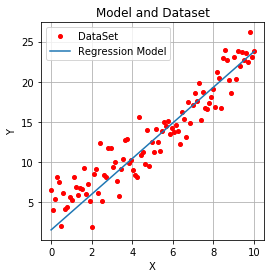

epoch : 40 , loss : 4.7795090675354


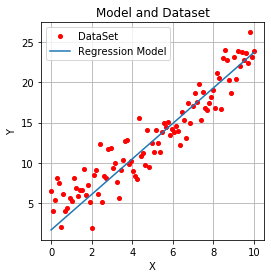

epoch : 50 , loss : 4.644508361816406


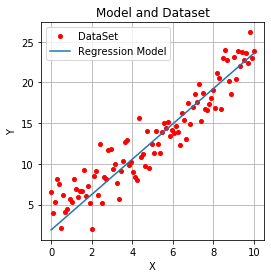

epoch : 60 , loss : 4.533929347991943


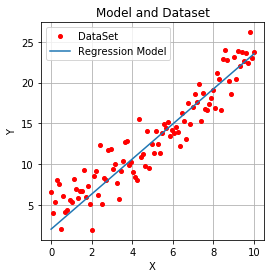

epoch : 70 , loss : 4.443353652954102


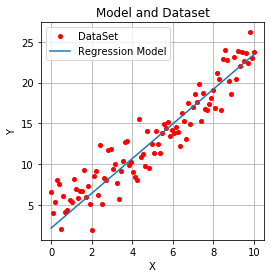

epoch : 80 , loss : 4.369163990020752


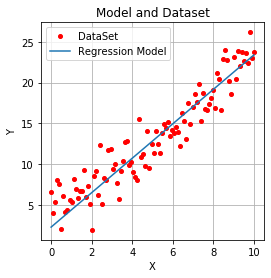

epoch : 90 , loss : 4.308394908905029


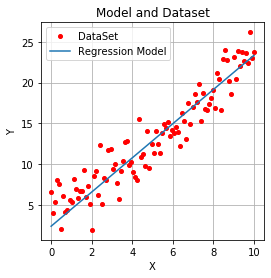

epoch : 100 , loss : 4.258619785308838


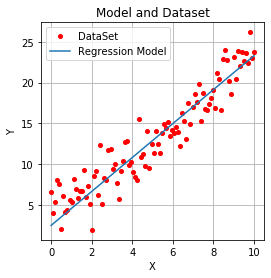

In [5]:
# Step4. Trainning
## Forward Propagation and backward Propagation : https://medium.com/uxai/%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92%E9%A6%AC%E6%8B%89%E6%9D%BE-075-%E5%8F%8D%E5%90%91%E5%82%B3%E6%92%AD-backpropagation-f1b612e003df
#                                                 https://www.zhihu.com/question/303070254

for epoch in range(number_epochs):
    # forward pass :
    y_prediction = model(inputs)
    
    # compute loss :
    loss = loss_function(y_prediction , outputs)
    
    # backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step() # information : https://pytorch-cn.readthedocs.io/zh/latest/package_references/torch-optim/
    
    # show result every 10 step
    if (( epoch + 1 ) % 10 == 0):
        print("epoch : {} , loss : {}".format(epoch+1 , loss.data))
        plt.figure(figsize=(4,4))
        plt.title("Model and Dataset")
        plt.xlabel("X") ; plt.ylabel("Y")
        plt.grid()
        plt.plot(x,y,"ro",label="DataSet",marker="o",markersize=4)
        plt.plot(x,  model.model.weight.item()*x+model.model.bias.item() ,  label='Regression Model') # Note : y = ax+b
        plt.legend(); plt.show()

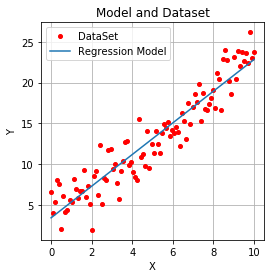

In [42]:
# Step5. Display model and confirm
plt.figure(figsize=(4,4))
plt.title("Model and Dataset")
plt.xlabel("X") ; plt.ylabel("Y")
plt.grid()
plt.plot(x,y,"ro",label="DataSet",marker="o",markersize=4)
plt.plot(x,  model.model.weight.item()*x+model.model.bias.item() ,  label='Regression Model') # Note : y = ax+b
plt.legend(); plt.show()